In [21]:
import pickle
import os
import yaml

import pandas as pd
import umap
from sklearn.decomposition import PCA
from plotnine import *

from saged import utils

In [ ]:
PREDICT_TISSUES = ['Blood', 'Breast', 'Stem Cell', 'Cervix', 'Brain', 'Kidney',
                   'Umbilical Cord', 'Lung', 'Epithelium', 'Prostate', 'Liver',
                   'Heart', 'Skin', 'Colon', 'Bone Marrow', 'Muscle', 'Tonsil',
                   'Blood Vessel', 'Spinal Cord', 'Testis', 'Placenta'
                   ]

In [4]:
dataset_dir = '../../data/'
config_path = '../../dataset_configs/recount_dataset.yml'

dataset_config = yaml.safe_load(config_path)

compendium_path = os.path.join(dataset_dir, 'no_scrna_tpm.pkl')
metadata_path = os.path.join(dataset_dir, 'recount_metadata.tsv')

In [10]:
expression_df = utils.load_compendium_file(compendium_path)
expression_df

,ENSG00000253132.1,ENSG00000172465.13,ENSG00000206013.2,ENSG00000214866.8,ENSG00000270390.1,ENSG00000235447.2,ENSG00000108602.17,ENSG00000279997.1,ENSG00000267112.1,ENSG00000234670.1,...,ENSG00000242960.1,ENSG00000274029.1,ENSG00000201945.1,ENSG00000121440.14,ENSG00000229616.2,ENSG00000088992.17,ENSG00000240964.3,ENSG00000111906.17,ENSG00000128596.16,ENSG00000255575.1
sample,,,,,,,,,,,,,,,,,,,,,
SRR7252609,0.000000,0.0,0.032837,0.004707,0.001635,0.000000,0.000000,0.013496,0.000366,0.000391,...,0.031219,1.072884e-06,0.111267,0.000012,9.536743e-07,0.032990,0.000041,0.004074,0.018295,0.0
SRR7252610,0.000000,0.0,0.033661,0.004501,0.002129,0.000000,0.000000,0.012924,0.000348,0.000447,...,0.029205,6.556511e-07,0.112244,0.000007,1.728535e-06,0.033600,0.000033,0.004040,0.017426,0.0
SRR7252611,0.000000,0.0,0.034485,0.003798,0.001598,0.000000,0.000000,0.014915,0.000149,0.000277,...,0.027313,1.728535e-06,0.092590,0.000012,3.719330e-05,0.039642,0.000039,0.002851,0.005867,0.0
SRR7252612,0.000001,0.0,0.034515,0.003933,0.001464,0.000000,0.000000,0.015579,0.000098,0.000355,...,0.026535,1.490116e-06,0.094055,0.000006,3.790855e-05,0.039520,0.000039,0.002867,0.005749,0.0
SRR4098609,0.000000,0.0,0.020752,0.006485,0.010612,0.000000,0.000000,0.017090,0.001408,0.000895,...,0.000033,0.000000e+00,0.083435,0.000001,7.748604e-07,0.057129,0.000000,0.003372,0.007381,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR7516586,0.000000,0.0,0.000406,0.011597,0.000767,0.000000,0.000009,0.002676,0.000080,0.000005,...,0.020187,0.000000e+00,0.001974,0.000158,1.567602e-05,0.004951,0.000000,0.003757,0.000842,0.0
SRR7516587,0.000000,0.0,0.000254,0.010231,0.000436,0.000000,0.000033,0.002975,0.000088,0.000006,...,0.021103,1.668930e-06,0.002224,0.000100,1.621246e-05,0.005638,0.000007,0.005466,0.000717,0.0
SRR7516588,0.000000,0.0,0.000266,0.012146,0.000486,0.000000,0.000021,0.003174,0.000199,0.000008,...,0.034851,1.907349e-06,0.001974,0.000288,0.000000e+00,0.010406,0.000013,0.007179,0.000767,0.0


In [6]:
sample_to_study = utils.recount_map_sample_to_study(metadata_path)
list(sample_to_study.items())[:5]

[('SRR7252610', 'SRP149665'),
 ('SRR7252611', 'SRP149665'),
 ('SRR7252612', 'SRP149665'),
 ('SRR7252609', 'SRP149665'),
 ('SRR629557', 'SRP017465')]

In [9]:
sample_to_label = None
label_path = os.path.join(dataset_dir, 'recount_sample_to_label.pkl')
with open(label_path, 'rb') as in_file:
    sample_to_label = pickle.load(in_file)
    
list(sample_to_label.items())[:5]

[('SRR1017153', 'Brain'),
 ('SRR1017154', 'Brain'),
 ('SRR1017155', 'Brain'),
 ('SRR1017157', 'Brain'),
 ('SRR1017159', 'Brain')]

In [ ]:
metadata_df = pd.read_csv(metadata_path, sep='\t')

In [61]:
sample_to_sequencer = dict(zip(metadata_df['external_id'], metadata_df['sra.platform_model']))
list(sample_to_sequencer.items())[:5]

[('SRR7252610', 'Illumina HiSeq 2000'),
 ('SRR7252611', 'Illumina HiSeq 2000'),
 ('SRR7252612', 'Illumina HiSeq 2000'),
 ('SRR7252609', 'Illumina HiSeq 2000'),
 ('SRR629557', 'Illumina HiSeq 2000')]

In [45]:
expression_df = expression_df[expression_df.index.isin(sample_to_label)]
expression_df = expression_df.sample(n=1000, random_state=42)

expression_df

,ENSG00000253132.1,ENSG00000172465.13,ENSG00000206013.2,ENSG00000214866.8,ENSG00000270390.1,ENSG00000235447.2,ENSG00000108602.17,ENSG00000279997.1,ENSG00000267112.1,ENSG00000234670.1,...,ENSG00000242960.1,ENSG00000274029.1,ENSG00000201945.1,ENSG00000121440.14,ENSG00000229616.2,ENSG00000088992.17,ENSG00000240964.3,ENSG00000111906.17,ENSG00000128596.16,ENSG00000255575.1
sample,,,,,,,,,,,,,,,,,,,,,
SRR901156,0.000000,0.0,0.006851,0.008148,0.008812,0.000000,0.000049,0.017929,0.013771,0.003763,...,0.002445,0.000000,0.071533,0.010712,0.000118,0.093018,0.0,0.000581,0.008583,0.0
SRR903293,0.000104,0.0,0.008530,0.005974,0.000616,0.000000,0.000000,0.002323,0.001930,0.000806,...,0.004925,0.000013,0.049896,0.000032,0.000261,0.049133,0.0,0.005203,0.016739,0.0
DRR006413,0.000000,0.0,0.003534,0.019531,0.000000,0.000000,0.000000,0.007381,0.000762,0.003424,...,0.105286,0.000000,0.040039,0.013130,0.000000,0.231567,0.0,0.012558,0.006771,0.0
SRR036617,0.000000,0.0,0.042755,0.045532,0.006802,0.000000,0.000000,0.037323,0.007446,0.006245,...,0.000016,0.000003,0.077942,0.000011,0.001168,0.040619,0.0,0.000170,0.010384,0.0
SRR645771,0.000000,0.0,0.021683,0.007904,0.004772,0.000000,0.000055,0.018204,0.005322,0.000839,...,0.000029,0.000000,0.093933,0.000001,0.011253,0.035828,0.0,0.005764,0.044159,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR243576,0.000000,0.0,0.005150,0.019608,0.008583,0.000062,0.000044,0.009186,0.000960,0.001918,...,0.000334,0.000000,0.070923,0.000396,0.000236,0.360107,0.0,0.001119,0.007996,0.0
SRR448103,0.000000,0.0,0.003252,0.074280,0.000434,0.000000,0.000000,0.003565,0.009438,0.001113,...,0.006271,0.000013,0.011147,0.000021,0.064331,0.059570,0.0,0.000892,0.000946,0.0
SRR1656508,0.000000,0.0,0.000150,0.003229,0.002144,0.000135,0.000000,0.014671,0.001289,0.001330,...,0.309082,0.000000,0.003307,0.005169,0.000000,0.186768,0.0,0.021729,0.001241,0.0


In [46]:
expression_matrix = expression_df.to_numpy()

## UMAP embedding of labeled data

In [47]:
embedder = umap.UMAP(transform_seed=42, random_state=42, n_components=2)

In [48]:
%%time
umap_expression = embedder.fit_transform(expression_matrix)

CPU times: user 8.06 s, sys: 10 ms, total: 8.07 s
Wall time: 8.26 s


In [62]:
umap_df = pd.DataFrame(umap_expression, index=expression_df.index, columns=['UMAP1', 'UMAP2'])
umap_df['label'] = umap_df.index.map(sample_to_label)
umap_df = umap_df[umap_df['label'].isin(PREDICT_TISSUES)]
# We could use the index directly in plotnine, but this will look cleaner
umap_df['sample_id'] = umap_df.index
umap_df['study_id'] = umap_df['sample_id'].map(sample_to_study)
umap_df['sequencer'] = umap_df['sample_id'].map(sample_to_sequencer)
umap_df

,UMAP1,UMAP2,label,sample_id,study_id,sequencer
sample,,,,,,
SRR901156,2.190404,7.517324,Skin,SRR901156,SRP026042,Illumina HiSeq 2000
DRR006413,4.511714,-0.412196,Blood,DRR006413,DRP000987,Illumina Genome Analyzer IIx
SRR645771,-2.886697,5.318195,Breast,SRR645771,SRP017788,Illumina HiSeq 2000
ERR204838,3.799331,3.844967,Blood,ERR204838,ERP001942,Illumina HiSeq 2000
SRR1146156,1.772396,7.130719,Skin,SRR1146156,SRP035988,Illumina Genome Analyzer
...,...,...,...,...,...,...
SRR243576,-3.251627,3.483246,Brain,SRR243576,SRP006970,Illumina Genome Analyzer II
SRR448103,15.526137,5.405642,Heart,SRR448103,SRP011924,Illumina Genome Analyzer
SRR1656508,4.926684,-1.559474,Blood,SRR1656508,SRP050000,Illumina Genome Analyzer II


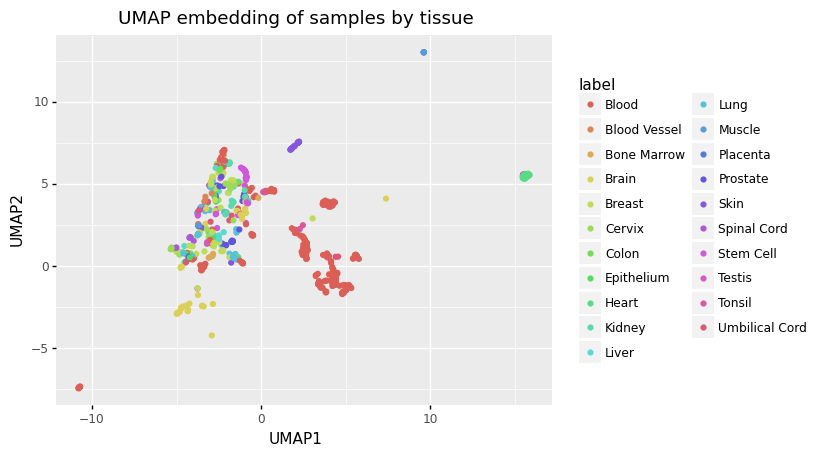

<ggplot: (8744031824957)>

In [74]:
plot = ggplot(umap_df, aes(x='UMAP1', y='UMAP2', color='label')) 
plot += geom_point()
plot += ggtitle('UMAP embedding of samples by tissue')
plot

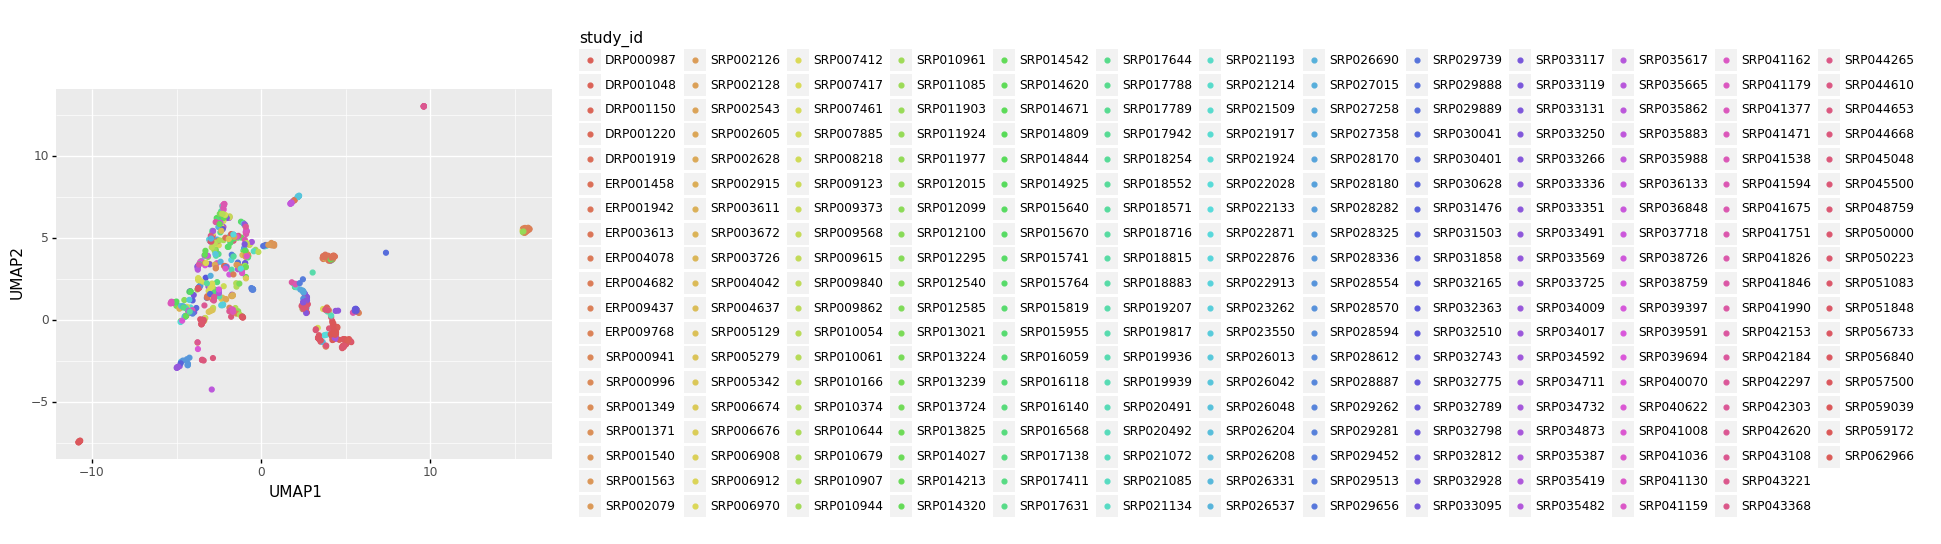

<ggplot: (8744327601253)>

In [51]:
plot = ggplot(umap_df, aes(x='UMAP1', y='UMAP2', color='study_id')) 
plot += geom_point()
plot

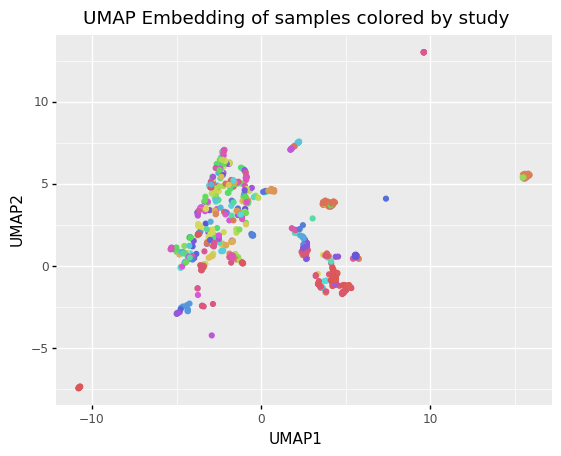

<ggplot: (8744252413861)>

In [63]:
plot = ggplot(umap_df, aes(x='UMAP1', y='UMAP2', color='study_id')) 
plot += geom_point()
# Remove legend
plot += scale_color_discrete(guide=False)
plot += ggtitle('UMAP Embedding of samples colored by study')
plot

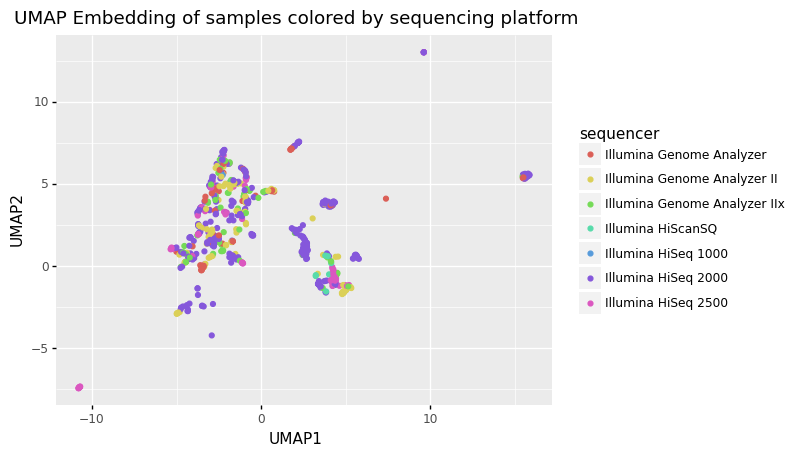

<ggplot: (8744277676761)>

In [65]:
plot = ggplot(umap_df, aes(x='UMAP1', y='UMAP2', color='sequencer')) 
plot += geom_point()
# Remove legend
plot += ggtitle('UMAP Embedding of samples colored by sequencing platform')
plot

## PCA Embedding

In [53]:
embedder = PCA(random_state=42, n_components=2)

In [54]:
%%time
pca_expression = embedder.fit_transform(expression_matrix)

CPU times: user 620 ms, sys: 32.4 ms, total: 653 ms
Wall time: 198 ms


In [66]:
pca_df = pd.DataFrame(pca_expression, index=expression_df.index, columns=['PC1', 'PC2'])
pca_df['label'] = pca_df.index.map(sample_to_label)
pca_df = pca_df[pca_df['label'].isin(PREDICT_TISSUES)]
# We could use the index directly in plotnine, but this will look cleaner
pca_df['sample_id'] = pca_df.index
pca_df['study_id'] = pca_df['sample_id'].map(sample_to_study)
pca_df['sequencer'] = pca_df['sample_id'].map(sample_to_sequencer)
pca_df

,PC1,PC2,label,sample_id,study_id,sequencer
sample,,,,,,
SRR901156,-0.306069,0.194598,Skin,SRR901156,SRP026042,Illumina HiSeq 2000
DRR006413,0.511367,0.609305,Blood,DRR006413,DRP000987,Illumina Genome Analyzer IIx
SRR645771,-0.337253,0.768726,Breast,SRR645771,SRP017788,Illumina HiSeq 2000
ERR204838,-0.060387,0.700572,Blood,ERR204838,ERP001942,Illumina HiSeq 2000
SRR1146156,-0.176092,-0.062877,Skin,SRR1146156,SRP035988,Illumina Genome Analyzer
...,...,...,...,...,...,...
SRR243576,-0.426273,0.239898,Brain,SRR243576,SRP006970,Illumina Genome Analyzer II
SRR448103,-0.263478,-0.557744,Heart,SRR448103,SRP011924,Illumina Genome Analyzer
SRR1656508,1.896090,-0.090512,Blood,SRR1656508,SRP050000,Illumina Genome Analyzer II


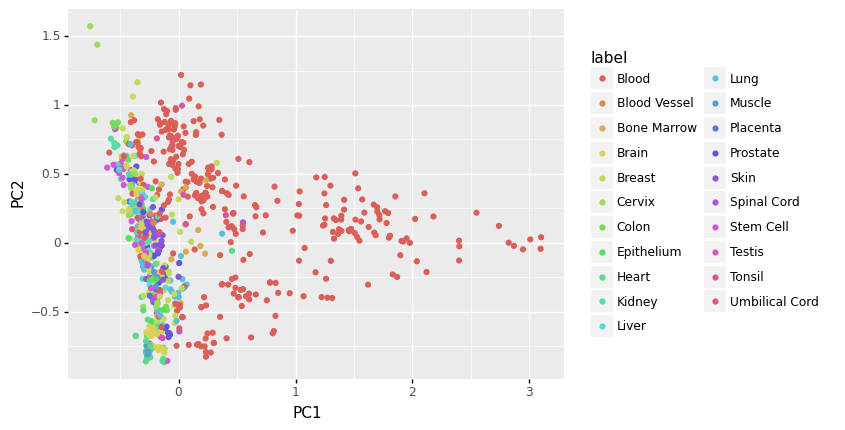

<ggplot: (8744033267345)>

In [67]:
plot = ggplot(pca_df, aes(x='PC1', y='PC2', color='label')) 
plot += geom_point()
plot

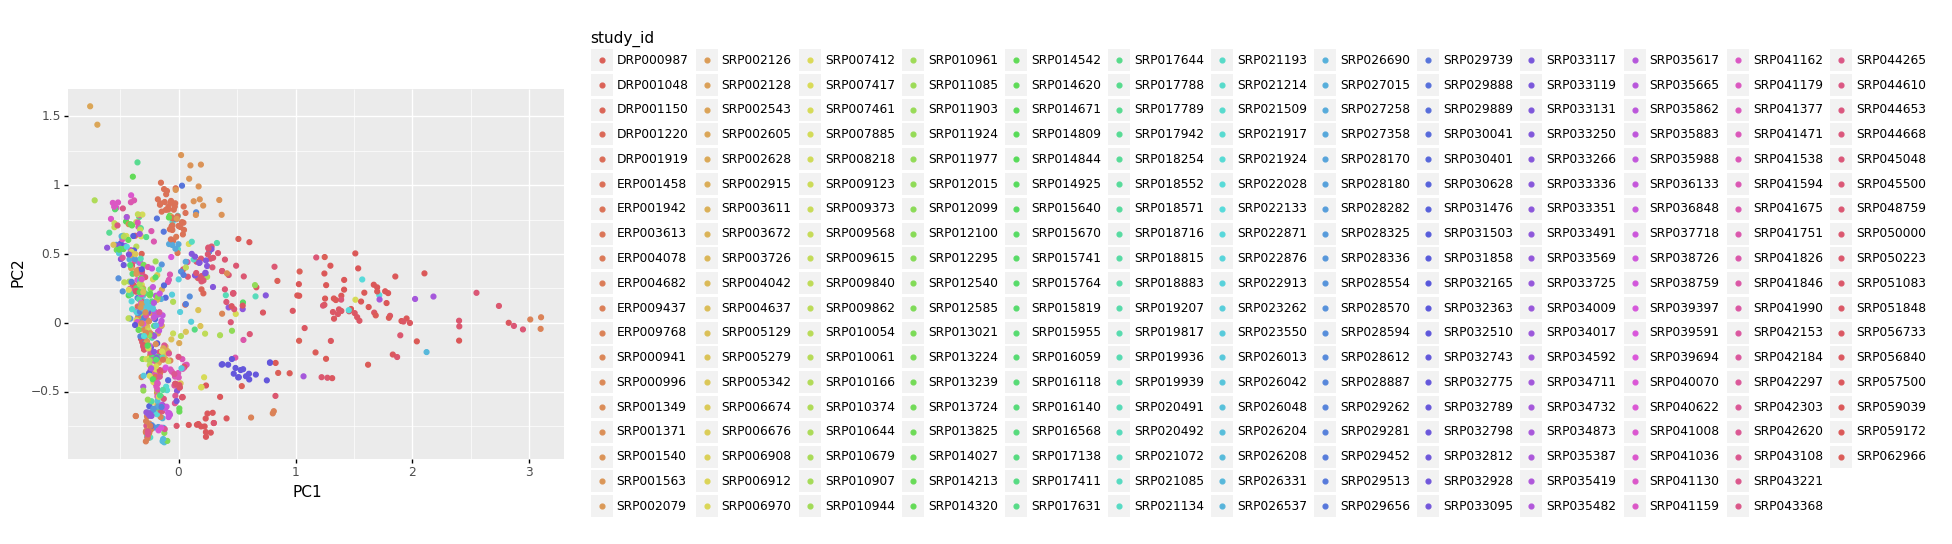

<ggplot: (8744032853273)>

In [68]:
plot = ggplot(pca_df, aes(x='PC1', y='PC2', color='study_id')) 
plot += geom_point()
plot

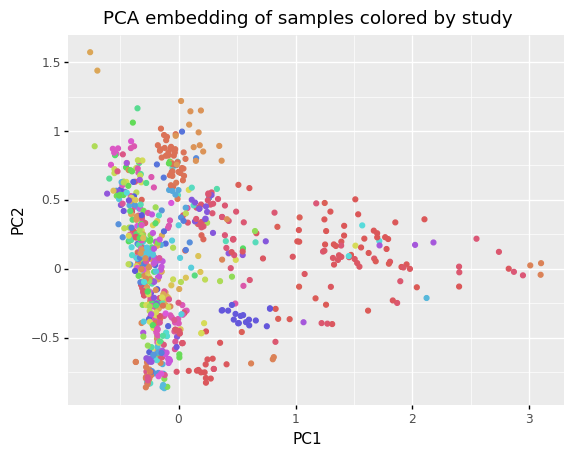

<ggplot: (8744104228361)>

In [71]:
plot = ggplot(pca_df, aes(x='PC1', y='PC2', color='study_id')) 
plot += geom_point()
# Remove legend
plot += scale_color_discrete(guide=False)
plot += ggtitle('PCA embedding of samples colored by study')
plot

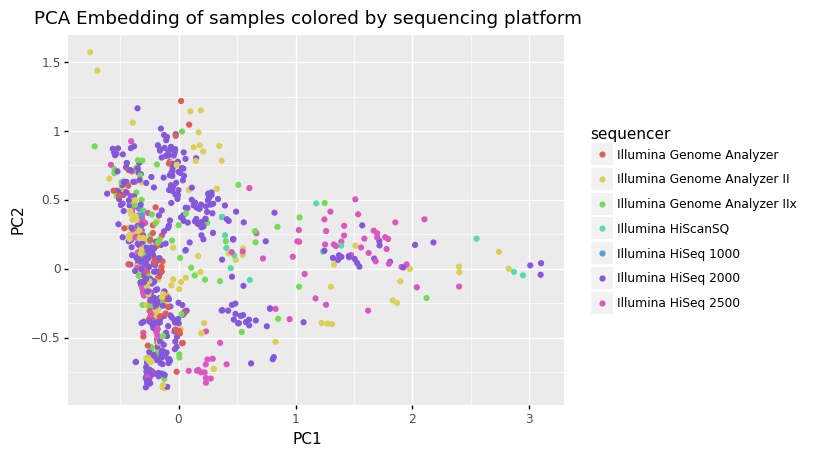

<ggplot: (8744031949205)>

In [72]:
plot = ggplot(pca_df, aes(x='PC1', y='PC2', color='sequencer')) 
plot += geom_point()
# Remove legend
plot += ggtitle('PCA Embedding of samples colored by sequencing platform')
plot